## Validate Data Completeness for Critical Fields

**Description**: In `transaction_data.csv` , calculate the missing percentage of critical fields: "transaction_id", "amount", and "date", and visualize them.

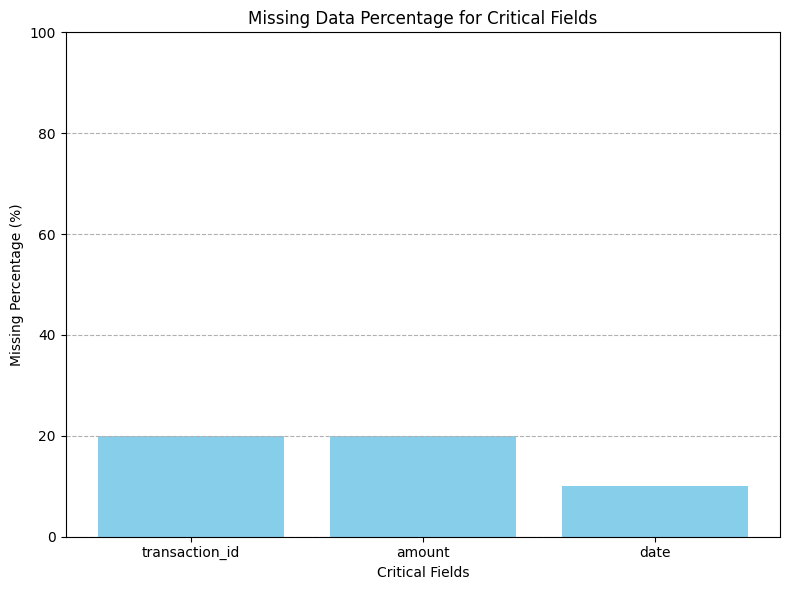


Missing Percentage for Critical Fields:
transaction_id: 20.00%
amount: 20.00%
date: 10.00%


In [1]:
# Write your code from here
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# Sample data for transaction_data.csv (replace with your actual file)
transaction_data = """transaction_id,amount,date,customer_id,product_id
TXN001,125.50,2025-05-10,CUST001,PROD001
TXN002,,2025-05-11,CUST002,PROD002
,78.90,2025-05-12,CUST001,PROD003
TXN004,45.20,,CUST003,PROD001
TXN005,99.99,2025-05-14,,PROD004
TXN006,200.00,2025-05-15,CUST002,
TXN007,55.75,2025-05-16,CUST004,PROD002
TXN008,,2025-05-17,CUST001,PROD005
TXN009,33.40,2025-05-18,CUST005,PROD001
,150.00,2025-05-19,CUST003,PROD006
"""
transaction_df = pd.read_csv(StringIO(transaction_data))

# Critical fields to check for completeness
critical_fields = ["transaction_id", "amount", "date"]

# Calculate the missing percentage for each critical field
missing_percentages = {}
for field in critical_fields:
    missing_count = transaction_df[field].isnull().sum()
    total_count = len(transaction_df)
    missing_percentage = (missing_count / total_count) * 100 if total_count > 0 else 0
    missing_percentages[field] = missing_percentage

# Visualize the missing data rates
fields = list(missing_percentages.keys())
percentages = list(missing_percentages.values())

plt.figure(figsize=(8, 6))
plt.bar(fields, percentages, color='skyblue')
plt.xlabel('Critical Fields')
plt.ylabel('Missing Percentage (%)')
plt.title('Missing Data Percentage for Critical Fields')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Print the missing percentages
print("\nMissing Percentage for Critical Fields:")
for field, percentage in missing_percentages.items():
    print(f"{field}: {percentage:.2f}%")